In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import torch

#path='./data/voter_grid_pressure_reeval'
#path='./data/voter_grid_crossover'
path='D:\\Uni\\BA\\GA\\logs\\voter_grid_60_moregrad'

## Join statistics

with open(path+'/all_populations.pickle', 'rb') as f:
    all_pops = pickle.load(f)
with open(path+'/all_scores.pickle', 'rb') as f:
    all_scores = pickle.load(f)
with open(path+'/mean_scores.pickle', 'rb') as f:
    mean_scores = pickle.load(f)
with open(path+'/max_scores.pickle', 'rb') as f:
    max_scores = pickle.load(f)
with open(path+'/tprs.pickle', 'rb') as f:
    tprs = pickle.load(f)
with open(path+'/fprs.pickle', 'rb') as f:
    fprs = pickle.load(f)
    
with open(path2+'/all_populations.pickle', 'rb') as f:
    all_pops2 = pickle.load(f)
with open(path2+'/all_scores.pickle', 'rb') as f:
    all_scores2 = pickle.load(f)
with open(path2+'/mean_scores.pickle', 'rb') as f:
    mean_scores2 = pickle.load(f)
with open(path2+'/max_scores.pickle', 'rb') as f:
    max_scores2 = pickle.load(f)
with open(path2+'/tprs.pickle', 'rb') as f:
    tprs2 = pickle.load(f)
with open(path2+'/fprs.pickle', 'rb') as f:
    fprs2 = pickle.load(f)
with open(path2+'./final_population.pickle', 'rb') as f:
    final_population2 = pickle.load(f)
    
all_pops = all_pops + all_pops2
all_scores = all_scores + all_scores2
mean_scores = mean_scores + mean_scores2
max_scores = max_scores + max_scores2
tprs = tprs + tprs2
fprs = fprs+ fprs2
    
with open(path_join + '/final_population.pickle', 'wb') as f:
    pickle.dump(final_population2, f)
with open(path_join + '/all_populations.pickle', 'wb') as f:
    pickle.dump(all_pops, f)
with open(path_join + '/all_scores.pickle', 'wb') as f:
    pickle.dump(all_scores, f)
with open(path_join + '/mean_scores.pickle', 'wb') as f:
    pickle.dump(mean_scores, f)
with open(path_join + '/max_scores.pickle', 'wb') as f:
    pickle.dump(max_scores, f)
with open(path_join + '/tprs.pickle', 'wb') as f:
    pickle.dump(tprs, f)
with open(path_join + '/fprs.pickle', 'wb') as f:
    pickle.dump(fprs, f)

## Visualize training progression

In [25]:
with open(path+'/mean_scores.pickle', 'rb') as f:
    mean_scores = pickle.load(f)
with open(path+'/max_scores.pickle', 'rb') as f:
    max_scores = pickle.load(f)
with open(path+'/tprs.pickle', 'rb') as f:
    tprs = pickle.load(f)
with open(path+'/fprs.pickle', 'rb') as f:
    fprs = pickle.load(f)

In [37]:
limit = 122
fprs = fprs[0:limit]
tprs = tprs[0:limit]
mean_scores = mean_scores[0:limit]
max_scores = max_scores[0:limit]

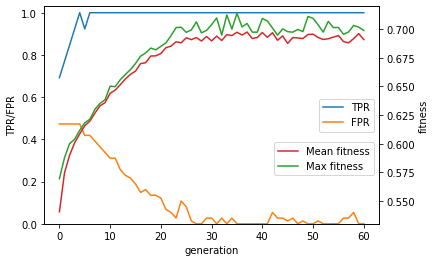

In [26]:
x = range(len(tprs))
fig, ax1 = plt.subplots()

ax1.set_xlabel('generation')
ax1.set_ylabel('TPR/FPR')
ax1.plot(x, tprs, label='TPR')
ax1.plot(x, fprs, label='FPR')
ax1.set_ylim([0.0,1.03])
ax1.legend(loc='right')
#ax1.legend(loc='center left', bbox_to_anchor=[1.15, 0.3])

ax2 = ax1.twinx()
ax2.set_ylabel('fitness')
ax2.plot(x,mean_scores, color='tab:red', label='Mean fitness')
ax2.plot(x,max_scores, color='tab:green', label='Max fitness')
#ax2.legend(loc='center left', bbox_to_anchor=[1.15, 0.5])
ax2.legend(loc='right', bbox_to_anchor=[1,0.3])
ax2.set_ylim([0.53,0.72])
ax2.plot()

plt.show()

In [27]:
#fig.savefig('./figures/voter_grid_60_moregrad.png')

## Evaluate diversity

In [6]:
path = r'D:\Uni\BA\ColabOutputs\SIS_FIXED_ba10\1'

In [8]:
with open(path+'/all_populations.pickle', 'rb') as f:
    all_pops = pickle.load(f)
with open(path+'/all_scores.pickle', 'rb') as f:
    all_scores = pickle.load(f)
    
NUM_GEN = len(all_pops)
POP_SIZE = len(all_pops[0])
NUM_NODES = 10

In [9]:
# calculates number of flipped bits between mat1 and mat2
def calc_num_flips(mat1, mat2):
    num = 0
    for i in range(NUM_NODES):
        for j in range(i,NUM_NODES):
            if not torch.eq(mat1[i,j], mat2[i,j]):
                num += 1
    return num

In [15]:
def get_unique_matrices(matrices):
    unique_matrices = list()
    for mat in matrices:
        if not any([(mat==umat).all() for umat in unique_matrices]):
            unique_matrices.append(mat)
    return unique_matrices
    

In [10]:
avg_dists = list()
for g in range(NUM_GEN):
    # calculate average distance
    if g % 10 == 0:
        print(g)
    dists = list()
    for i in range(POP_SIZE):
        for j in range(i+1, POP_SIZE):
            dists.append(calc_num_flips(all_pops[g][i], all_pops[g][j]))
    avg_dist = sum(dists) / len(dists)
    avg_dists.append(avg_dist)
print('done')

0
10
20
done


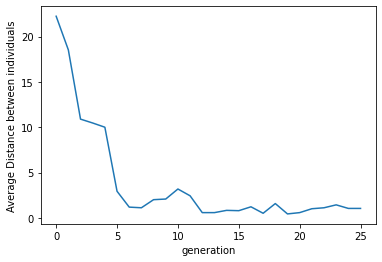

In [11]:
x = range(NUM_GEN)
fig, ax = plt.subplots()
ax.set_xlabel('generation')
ax.set_ylabel('Average Distance between individuals')
ax.plot(x, avg_dists)
plt.show()

In [16]:
for i in range(NUM_GEN):
    print(str(i)+': '+str(len(get_unique_matrices(all_pops[i]))))

0: 8
1: 5
2: 4
3: 5
4: 7
5: 5
6: 3
7: 3
8: 4
9: 5
10: 6
11: 5
12: 2
13: 2
14: 3
15: 3
16: 4
17: 2
18: 4
19: 2
20: 2
21: 3
22: 3
23: 3
24: 4
25: 3
